In [3]:
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 25.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 27.0 MB/s eta 0:00:00


In [4]:
# Task-1 Data Loading & Familiarization
# .Load the dataset and examine the structure and content
# .Understand the types of data in each column


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
df = pd.read_csv('/home/nashtech/Assignment-1-AI-ML/Titanic-Dataset.csv')

In [6]:
# Display the first few rows and summary information
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [7]:
# Data Cleaning
# Address missing values appropriately (e.g., fill, remove)
# Remove or simplify irrelevant or redundant columns
# Prepare categorical variables for analysis (e.g., converting to consistent format)

In [8]:
# The (Age) have 177 missing values so they are filled with using median.
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with the mode ('S')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the Cabin column due to a high number of missing values
df = df.drop('Cabin', axis=1)

In [11]:
# --- Prepare Categorical Variables ---

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S':2})

In [12]:
# --- Data Analysis ---


In [13]:
# 1. Survival trends by gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# 2. Survival trends by passenger class
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()

In [14]:
# --- Visualization ---


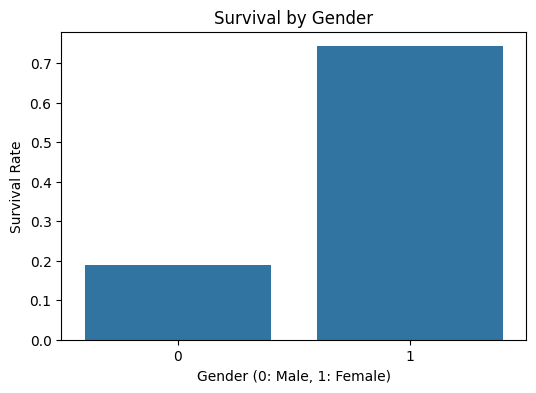

In [20]:
# 1. Survival by Gender

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Survival Rate')
plt.show()

# Females tend to have a higher survival rate than males.


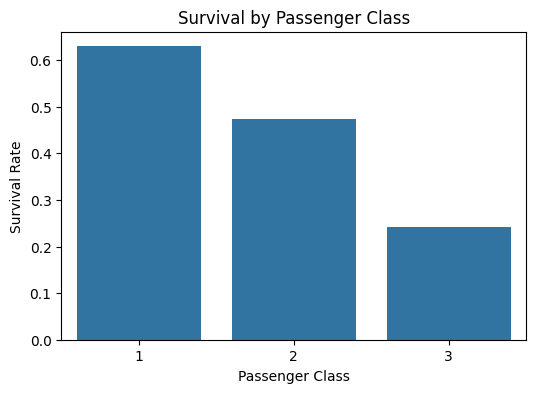

In [21]:
# 2. Survival by Passenger Class

plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# First-class passengers have a higher survival rate compared to second- and third-class passengers.

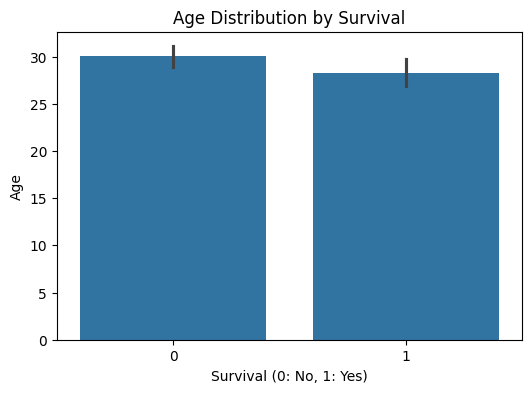

In [24]:
# 3. Age Distribution by Survival

plt.figure(figsize=(6, 4))
sns.barplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survival (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

# Younger passengers tend to have higher survival rates.